In [1]:
"""
Name: Ana Cristina Bitar de Oliveira
Applied Data Science Capstone
Notebook for the capstone project: Predictions about Collisions Severity in Seattle


IBM Data Science Professional Certificate

"""
import pandas as pd
import numpy as np

print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [2]:
#import csv file
df= pd.read_csv('https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv')
#df= pd.read_csv('Collisions.csv')
#exclui colunas desnecessarias
lista = ['OBJECTID','INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC']
lista = lista + ['INCDATE', 'SDOT_COLCODE', 'SDOT_COLDESC','SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY']
lista = lista + ['CROSSWALKKEY','INATTENTIONIND', 'PEDROWNOTGRNT','SPEEDING']
df.drop(axis='columns',labels=lista, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221389 entries, 0 to 221388
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                213918 non-null  float64
 1   Y                213918 non-null  float64
 2   ADDRTYPE         217677 non-null  object 
 3   SEVERITYCODE     221388 non-null  object 
 4   SEVERITYDESC     221389 non-null  object 
 5   COLLISIONTYPE    195159 non-null  object 
 6   PERSONCOUNT      221389 non-null  int64  
 7   PEDCOUNT         221389 non-null  int64  
 8   PEDCYLCOUNT      221389 non-null  int64  
 9   VEHCOUNT         221389 non-null  int64  
 10  INJURIES         221389 non-null  int64  
 11  SERIOUSINJURIES  221389 non-null  int64  
 12  FATALITIES       221389 non-null  int64  
 13  INCDTTM          221389 non-null  object 
 14  JUNCTIONTYPE     209417 non-null  object 
 15  UNDERINFL        195179 non-null  object 
 16  WEATHER          194969 non-null  obje

In [3]:
#delete rows with SEVERITYCODE = 0 (Unknown)
#gerar lista de indices
lista = []
for i in range(df.shape[0]):
    Codigo = df['SEVERITYCODE'].iloc[i]
    if Codigo == '0': 
       lista.append(i)
df.drop(axis='index', labels=lista,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199795 entries, 0 to 221388
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                194390 non-null  float64
 1   Y                194390 non-null  float64
 2   ADDRTYPE         197864 non-null  object 
 3   SEVERITYCODE     199794 non-null  object 
 4   SEVERITYDESC     199795 non-null  object 
 5   COLLISIONTYPE    195157 non-null  object 
 6   PERSONCOUNT      199795 non-null  int64  
 7   PEDCOUNT         199795 non-null  int64  
 8   PEDCYLCOUNT      199795 non-null  int64  
 9   VEHCOUNT         199795 non-null  int64  
 10  INJURIES         199795 non-null  int64  
 11  SERIOUSINJURIES  199795 non-null  int64  
 12  FATALITIES       199795 non-null  int64  
 13  INCDTTM          199795 non-null  object 
 14  JUNCTIONTYPE     193414 non-null  object 
 15  UNDERINFL        195178 non-null  object 
 16  WEATHER          194967 non-null  obje

In [5]:
#delete rows with empty cells for the main attributes
df.dropna(subset = ['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND'],axis=0, inplace=True, how='any')

In [6]:
# Data Transformation
# 1. Generate lists of tuples for further transformation
roadcond = []
cod = 0
df['ROADCOND'] = df['ROADCOND'].replace(np.nan,'Unknown')
for i in df['ROADCOND'].unique():
    roadcond.append((i,cod))
    cod = cod + 1

lightcond = []
cod = 0
df['LIGHTCOND'] = df['LIGHTCOND'].replace(np.nan,'Unknown')
for i in df['LIGHTCOND'].unique():
    lightcond.append((i,cod))
    cod = cod + 1

weather = []
cod = 0
df['WEATHER'] = df['WEATHER'].replace(np.nan,'Unknown')
for i in df['WEATHER'].unique():
    weather.append((i,cod))
    cod = cod + 1
    
junctiontype = []
cod = 0
df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].replace(np.nan,'Unknown')
for i in df['JUNCTIONTYPE'].unique():
    junctiontype.append((i,cod))
    cod = cod + 1

df['COLLISIONTYPE'] = df['COLLISIONTYPE'].replace(np.nan,'Unknown')
collisiontype = []
cod = 0
for i in df['COLLISIONTYPE'].unique():
    collisiontype.append((i,cod))
    cod = cod + 1

addresstype = []
cod = 0
df['ADDRTYPE'] = df['ADDRTYPE'].replace(np.nan,'Unknown')
for i in df['ADDRTYPE'].unique():
    addresstype.append((i,cod))
    cod = cod + 1

severitydesc = df['SEVERITYDESC'].unique()
df.drop(axis=1, labels='SEVERITYDESC',inplace=True)

In [7]:
# 2. Transform boolean
df['UNDERINFL'] = df['UNDERINFL'].replace(['N','0'],False).astype('Bool')
#df['PEDROWNOTGRNT'] = df['PEDROWNOTGRNT'].replace(np.nan,False).astype('Bool')
#df['SPEEDING'] = df['SPEEDING'].replace(np.nan,False).astype('Bool')
df['HITPARKEDCAR'] = df['HITPARKEDCAR'].replace('N',False).astype('Bool')

In [8]:
# 3. Cathegorical to Values
for i in roadcond:
    df['ROADCOND'] = df['ROADCOND'].replace(i[0],i[1])
for i in lightcond:
    df['LIGHTCOND'] = df['LIGHTCOND'].replace(i[0],i[1])
for i in weather:
    df['WEATHER'] = df['WEATHER'].replace(i[0],i[1])
for i in junctiontype:
    df['JUNCTIONTYPE'] = df['JUNCTIONTYPE'].replace(i[0],i[1])
for i in addresstype:
    df['ADDRTYPE'] = df['ADDRTYPE'].replace(i[0],i[1])
for i in collisiontype:
    df['COLLISIONTYPE'] = df['COLLISIONTYPE'].replace(i[0],i[1])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194697 entries, 0 to 221388
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                189455 non-null  float64
 1   Y                189455 non-null  float64
 2   ADDRTYPE         194697 non-null  int64  
 3   SEVERITYCODE     194697 non-null  object 
 4   COLLISIONTYPE    194697 non-null  int64  
 5   PERSONCOUNT      194697 non-null  int64  
 6   PEDCOUNT         194697 non-null  int64  
 7   PEDCYLCOUNT      194697 non-null  int64  
 8   VEHCOUNT         194697 non-null  int64  
 9   INJURIES         194697 non-null  int64  
 10  SERIOUSINJURIES  194697 non-null  int64  
 11  FATALITIES       194697 non-null  int64  
 12  INCDTTM          194697 non-null  object 
 13  JUNCTIONTYPE     194697 non-null  int64  
 14  UNDERINFL        194697 non-null  bool   
 15  WEATHER          194697 non-null  int64  
 16  ROADCOND         194697 non-null  int6

In [17]:
#undersampling
#delete some rows with SEVERITYCODE = 1 and 2

df.reset_index(inplace=True)

#gerar lista de indices
lista = []
for i in range(int(df.shape[0]/2)):
    Codigo = df['SEVERITYCODE'].iloc[i]
    if Codigo == '1' or Codigo == '2': 
       lista.append(i)

df.drop(axis='index', labels=lista,inplace=True)

In [18]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

#First attempt = no weight
#df_dtree = df[['WEATHER', 'ROADCOND', 'LIGHTCOND']]

#Using all the attributes
df_dtree = df[['ADDRTYPE', 'COLLISIONTYPE','JUNCTIONTYPE','WEATHER', 'ROADCOND', 'LIGHTCOND', 'HITPARKEDCAR']]

In [19]:
X = df_dtree.values
y = (df[['SEVERITYCODE']]).values

#split Data 70% training 30% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=3)

In [20]:
Severity_Tree = DecisionTreeClassifier(criterion="entropy", max_depth=6)
Severity_Tree

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [21]:
#Train
Severity_Tree.fit(X_train,y_train)
#Predict
predtree = Severity_Tree.predict(X_test)
#Evaluate Accuracy
print("Accuracy on severity predictions: ", round(metrics.accuracy_score(y_test, predtree),2)*100,"%")

Accuracy on severity predictions:  71.0 %


In [22]:
#Check accuracy for each level of severity
#lists to store the results

total = [0,0,0,0]
total_acertos = [0,0,0,0]
sev = ['1', '2', '2b', '3']

for i in range(len(y_test)):
    if y_test[i] == '1':
        total[0] = total[0] + 1
        if predtree[i] == '1': total_acertos[0] = total_acertos[0]+1
    elif y_test[i] == '2':
        total[1] = total[1] + 1
        if predtree[i] == '2': total_acertos[1] = total_acertos[1]+1
    elif y_test[i] == '2b':
        total[2] = total[2] + 1
        if predtree[i] == '2b': total_acertos[2] = total_acertos[2]+1
    elif y_test[i] == '3':
        total[3] = total[3] + 1
        if predtree[i] == '3': total_acertos[3] = total_acertos[3]+1

print(total)
print(total_acertos)
print('Accuracy: ', round(sum(total_acertos)/sum(total)*100,2), "%")
    

[32737, 15085, 1559, 165]
[32292, 3121, 0, 0]
Accuracy:  71.47 %


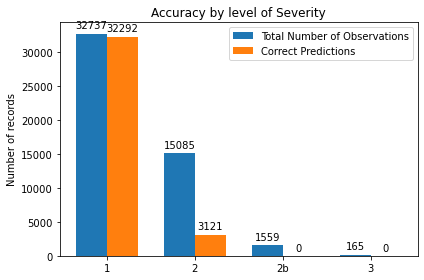

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

labels = sev

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, total, width, label='Total Number of Observations')
rects2 = ax.bar(x + width/2, total_acertos, width, label='Correct Predictions')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of records')
ax.set_title('Accuracy by level of Severity')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()